In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Exams = pd.read_csv("/kaggle/input/student-performance-in-mathematics/exams.csv")

In [ ]:
Exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
Exams.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,67.810,15.250196,15.0,58.0,68.0,79.25,100.0
reading score,1000.0,70.382,14.107413,25.0,61.0,70.5,80.00,100.0
writing score,1000.0,69.140,15.025917,15.0,59.0,70.0,80.00,100.0


In [ ]:
Exams.isna().sum()  #No null values present in the given dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
Exams.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77


# Renaming of columns

In [ ]:
Exams.rename(columns = {"gender":"Gender","race/ethnicity":"Race/Ethnicity","parental level of education":"Parent's_Education","lunch":"Lunch","test preparation course":"Test_Preperation","math score":"Math_score","reading score":"Reading_score","writing score":"Writing_score"},inplace = True)

In [ ]:
#Creating new column to calculate the total marks of math,reading and writing and also providing ranks.

Exams["Total"] = Exams["Math_score"]+Exams["Reading_score"]+Exams["Writing_score"]

#Ranking is done by using method = min so that students with same marks will get the same rank and the next rank will be continued by alternate number.

Exams["Rank"] = Exams["Total"].rank(ascending = False,method= "min")

#Sorting of values are done in ascending order

Exams.sort_values("Rank", inplace = True)

#Index is set to Rank

Exams = Exams.set_index("Rank")


In [ ]:
#New column P/F is created in which if any student gets less than 35 in any subject it will be considered as Fail(F)

Exams["P/F"] = ["P" if (i["Math_score"] > 35 and i["Reading_score"] > 35 and i["Writing_score"] > 35) else "F" for index, i in Exams.iterrows()]
Exams

,Gender,Race/Ethnicity,Parent's_Education,Lunch,Test_Preperation,Math_score,Reading_score,Writing_score,Total,P/F
Rank,,,,,,,,,,
1.0,male,group D,bachelor's degree,standard,completed,100,100,100,300,P
1.0,male,group E,bachelor's degree,standard,completed,100,100,100,300,P
3.0,male,group D,associate's degree,standard,completed,99,100,100,299,P
4.0,male,group D,associate's degree,standard,completed,100,100,98,298,P
5.0,female,group E,bachelor's degree,standard,completed,98,100,99,297,P
...,...,...,...,...,...,...,...,...,...,...
996.0,female,group C,associate's degree,free/reduced,none,28,32,28,88,F
997.0,male,group C,some high school,standard,none,28,27,23,78,F
998.0,male,group C,high school,standard,none,31,27,19,77,F


In [ ]:
Gender_wise_strength = Exams["Gender"].value_counts()

Gender_wise_strength

male      508
female    492
Name: Gender, dtype: int64

# 1.Group by education and gender

In [ ]:
#New dataframe is created with rank, Gender and parent's education

Parents = Exams[["Gender","Parent's_Education"]]

#Grouping of columns are done based on Parent's education and gender and their count is calculated.

Parents = Parents.groupby("Parent's_Education")["Gender"].value_counts()

#Series is converted to DataFrame

Parents = pd.DataFrame(Parents)

#Column rename is done from Gender to Count

Parents = Parents.rename(columns = {"Gender":"Count"})

Parents

Count
Parent's_Education Gender       
associate's degree male      103
                   female    101
bachelor's degree  male       53
                   female     52
high school        female    116
                   male       99
master's degree    male       42
                   female     33
some college       male      118
                   female    106
some high school   male       93
                   female     84

# Plotting bar chart of Parent's education vs student gender

<AxesSubplot: title={'center': "Parent's education vs Student gender"}, xlabel='Count'>

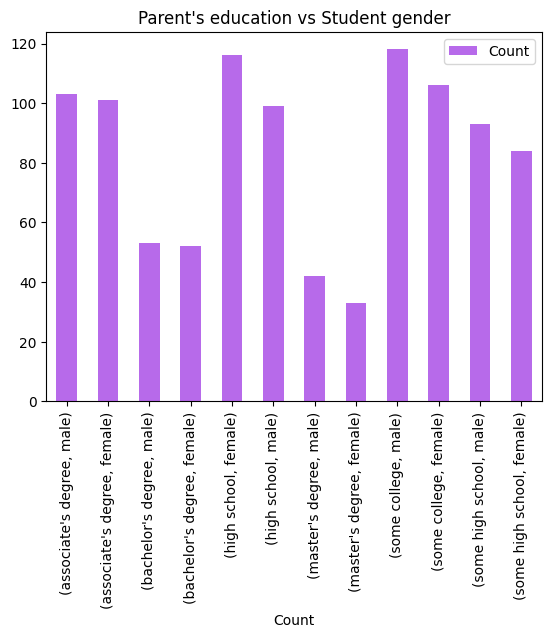

In [ ]:
#Visualization is done for parents dataframe

Colors = ["#B76AEA"]

Parents.plot(kind = "bar",xlabel = "Count",title = "Parent's education vs Student gender", color = Colors)

# 2. Mean of whole strength and comparing who are below mean and above mean

In [ ]:
#Mean value of the total column is calculated

Mean = Exams["Total"].mean()

#New dataframe is created with name Mean_value

Mean_value = Exams[["Total"]]

#New column performance is created with values being good or poor based on mean value. If value is above mean then performance is good else poor.

Mean_value["Performance"] = ["Good" if value >= Mean else "Poor" for value in Mean_value["Total"]]

#Calculated count of good performing students and poor performing students and created a dataframe

Mean_count = Mean_value["Performance"].value_counts().reset_index()

#Renaming of columns has been done

Mean_count = Mean_count.rename(columns = {"index":"Performance","Performance":"Count"})

#Index has been set to Performance column

Mean_count = Mean_count.set_index("Performance")

#Performance_Percentage column is created and percentage is calculated

Mean_count["Performance_Percentage"] = [(i/1000)*100 for i in Mean_count["Count"]]

Mean_count

/tmp/ipykernel_20/645213746.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mean_value["Performance"] = ["Good" if value >= Mean else "Poor" for value in Mean_value["Total"]]


,Count,Performance_Percentage
Performance,,
Good,515,51.5
Poor,485,48.5


# Plotting pie chart based on Performance percentile

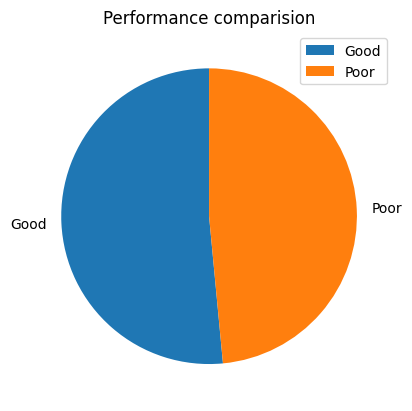

In [ ]:
Mean_count.plot(kind = "pie",ylabel = "", title = "Performance comparision",y = "Performance_Percentage", startangle = 90)
plt.legend()

# 3. Pass vs Fail Comparision

In [ ]:
# P/F column value counts are found out and data frame is created

Comparision = Exams["P/F"].value_counts().reset_index()

#Renaming of columns are done

Comparision  = Comparision.rename(columns ={"index":"P/F","P/F":"Count"})

#Index has been set to P/F

Comparision = Comparision.set_index("P/F")

#New column P/F_percentage is created and percentage is calculated

Comparision["P/F_percentage"] = [(i/1000)*100 for i in Comparision["Count"]]

Comparision

,Count,P/F_percentage
P/F,,
P,971,97.1
F,29,2.9


# Plotting pie chart based on Pass and Fail percentile

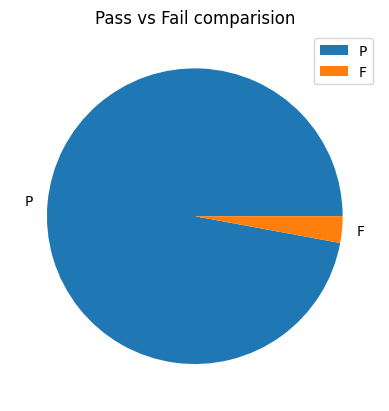

In [ ]:
Comparision.plot(kind = "pie", title = "Pass vs Fail comparision", y ="P/F_percentage", ylabel = "" )
plt.legend()

# 4. Gender wise pass and fail strength

In [ ]:
#Grouping of P/F and Gender columns and calculating the value_counts and sorting the values and assigning it to variable Gender_pass

Gender_pass = Exams.groupby(Exams["P/F"])["Gender"].value_counts().sort_values()

Gender_pass

P/F  Gender
F    male       12
     female     17
P    female    475
     male      496
Name: Gender, dtype: int64

# Plotting bar chart between Gender and P/F

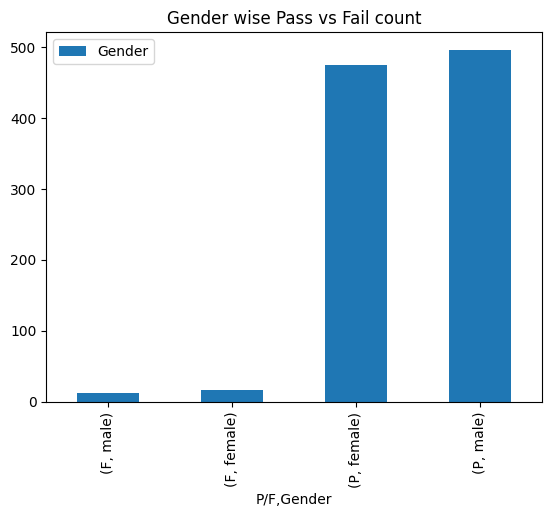

In [ ]:
Gender_pass.plot(kind = "bar", title = "Gender wise Pass vs Fail count")

plt.legend()

# 5. Race/Ethnicity of students count

In [ ]:
#Value_counts of Race/Ethnicity column is found and sorted in ascending order

Overall = Exams["Race/Ethnicity"].value_counts().sort_values()
Overall

group A     79
group E    143
group B    198
group D    257
group C    323
Name: Race/Ethnicity, dtype: int64

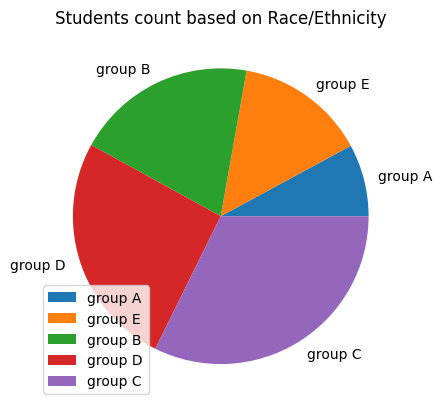

In [ ]:
Overall.plot(kind = "pie", title = "Students count based on Race/Ethnicity",ylabel ="",startangle = 0)
plt.legend()